In [14]:
import torch
import torch.nn as nn
import numpy as np

import torch
import torch.backends.cudnn as cudnn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100

In [37]:
class PadPrompter(nn.Module):
    def __init__(self):
        super(PadPrompter, self).__init__()
        pad_size = 30
        image_size = 224

        self.base_size = image_size - pad_size*2
        self.pad_up = nn.Parameter(torch.randn([1, 3, pad_size, image_size]))
        self.pad_down = nn.Parameter(torch.randn([1, 3, pad_size, image_size]))
        self.pad_left = nn.Parameter(torch.randn([1, 3, image_size - pad_size*2, pad_size]))
        self.pad_right = nn.Parameter(torch.randn([1, 3, image_size - pad_size*2, pad_size]))

    def forward(self, x):
        base = torch.zeros(1, 3, self.base_size, self.base_size)
        prompt = torch.cat([self.pad_left, base, self.pad_right], dim=3)
        prompt = torch.cat([self.pad_up, prompt, self.pad_down], dim=2)
        prompt = torch.cat(x.size(0) * [prompt])

        return x + prompt

In [38]:
prompt = PadPrompter()

In [32]:
# create data
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])

train_dataset = CIFAR100("./data", transform=preprocess,
                          download=True, train=True)

val_dataset = CIFAR100("./data", transform=preprocess,
                        download=True, train=False)

train_loader = DataLoader(train_dataset,
                          batch_size=32, pin_memory=True,
                          num_workers=16, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [33]:
train_features, train_labels = next(iter(train_loader))

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


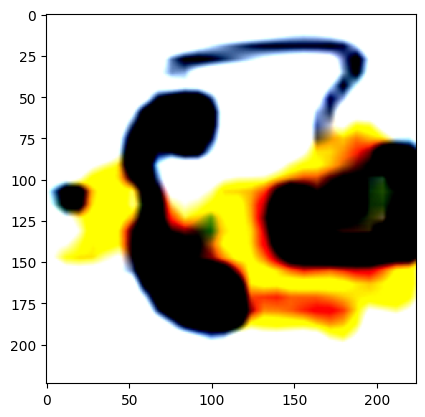

Label: 86


In [40]:
import matplotlib.pyplot as plt

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].T
image = train_features[0]
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [46]:
prompted_images = prompt(image)[0]

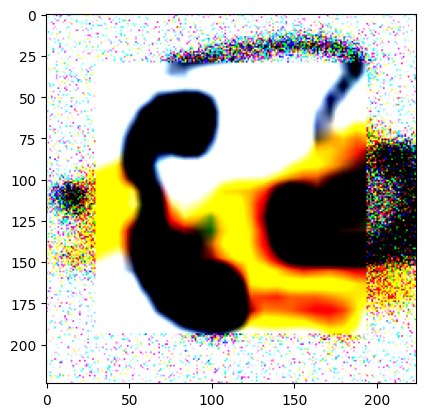

In [51]:
numpy_data = prompted_images.detach().numpy()


plt.imshow(numpy_data.T, cmap="gray")
plt.show()